In [13]:
import numpy as np
import pandas as pd
from PIL import Image
import random
import importlib
import ann_utils
importlib.reload(ann_utils)
import matplotlib.pyplot as plt

In [3]:
## This notebook read annotation file then subset a dataset that contain only 4 classses, each class will have more than 100 annotations and 20 images.
#After that, it will split the dataset into train and valid dataset with split ratio 1:9

In [2]:
ann_final=pd.read_csv("ann_final.csv")

In [3]:
ann_final['x_c']=round(0.5*(ann_final['x_min']+ann_final['x_max']))
ann_final['y_c']=round(0.5*(ann_final['y_min']+ann_final['y_max']))

In [4]:
ann_final.head(3)

,y,height,labelclass_index,x,filename,width,labelclass_name,filepath,Exist,im_width,im_height,x_min,x_max,y_min,y_max,x_c,y_c
0,0.170465,0.010936,1,0.985655,MBALAGETI/MBAL_6/UG_GAME_CAMERAS_MBALAGETI_MBA...,0.006916,Wildebeest,/home/data/cameratraps/MBALAGETI/MBAL_6/UG_GAM...,True,2592,1944,2546.0,2564.0,321.0,342.0,2555.0,332.0
1,0.228536,0.020074,1,0.458230,MBALAGETI/MBAL_6/UG_GAME_CAMERAS_MBALAGETI_MBA...,0.021680,Wildebeest,/home/data/cameratraps/MBALAGETI/MBAL_6/UG_GAM...,True,2592,1944,1160.0,1216.0,425.0,464.0,1188.0,444.0
2,0.224561,0.024392,1,0.733883,MBALAGETI/MBAL_6/UG_GAME_CAMERAS_MBALAGETI_MBA...,0.009800,Wildebeest,/home/data/cameratraps/MBALAGETI/MBAL_6/UG_GAM...,True,2592,1944,1890.0,1915.0,413.0,460.0,1902.0,436.0


In [5]:
#list of labels with more than 100 annotations and more than 20 images
labels=[]
for label in np.unique(ann_final['labelclass_name']):
    df1=ann_final[ann_final['labelclass_name']==label]
    if (df1.shape[0] >100) and (len(np.unique(df1['filepath']))>20):
        labels.append(label)
print(labels)

['Baboon', 'Buffalo', 'Cattle', 'Eland', 'Elephant', 'Giraffe', 'Grants Gazelle', 'Hartebeest', 'Impala', 'Other', 'Thomsons Gazelle', 'Topi', 'Warthog', 'Wildebeest', 'Zebra']


In [7]:
#Pick up for labels for dissertation: 
label_imbalance=["Elephant","Giraffe","Grants Gazelle","Wildebeest"]
ann_imbalance=ann_final[ann_final['labelclass_name'].isin(label_imbalance)]

In [14]:
#count number of annotations for each class
label_count=ann_utils.count_label(ann_imbalance)
label_count

,Label,No of annotations
0,Elephant,288
1,Giraffe,124
2,Grants Gazelle,246
3,Wildebeest,35023


In [15]:
#count number of images for each class
img_count=ann_utils.count_img(ann_imbalance)
img_count

,Label,No of Images
0,Elephant,117
1,Giraffe,90
2,Grants Gazelle,106
3,Wildebeest,3883


In [87]:
#number of images per class
len(np.unique(ann_imbalance['filepath']))

4186

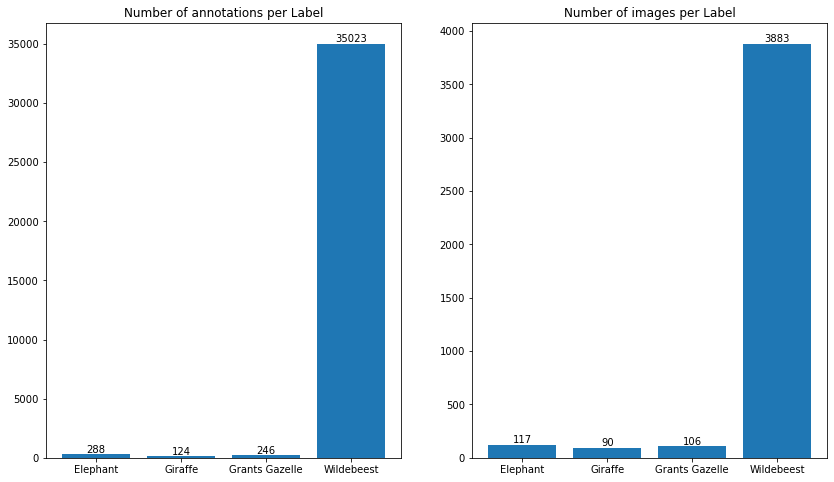

In [67]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,8))
ax[0].bar(label_count['Label'],label_count['No of annotations'])
ax[0].set_title("Number of annotations per Label")
for i in range(4):
    ax[0].text(i,label_count['No of annotations'][i]+120,label_count['No of annotations'][i],ha='center')

ax[1].bar(img_count['Label'],img_count['No of Images'])
ax[1].set_title("Number of images per Label")

for i in range(4):
    ax[1].text(i,img_count['No of Images'][i]+20,img_count['No of Images'][i],ha='center')

In [56]:
#split train and valid
im_list=list(np.unique(ann_imbalance['filepath']))
val_no=int(0.1*len(im_list))
random.seed(100)
train_list=random.sample(im_list,val_no)

imbalance_train=ann_imbalance[ann_imbalance['filepath'].isin(train_list)]
imbalance_valid=ann_imbalance[~ann_imbalance['filepath'].isin(train_list)]
imbalance_train.groupby('labelclass_name')['labelclass_name'].count()

labelclass_name
Elephant            30
Giraffe             17
Grants Gazelle      19
Wildebeest        3622
Name: labelclass_name, dtype: int64

In [57]:
#number of images per class
train_im_count=ann_utils.count_img(imbalance_train)
train_im_count

,Label,No of Images
0,Elephant,10
1,Giraffe,10
2,Grants Gazelle,9
3,Wildebeest,389


In [68]:
#number of annotations per class
train_label_count=ann_utils.count_label(imbalance_train)
train_label_count

,Label,No of annotations
0,Elephant,30
1,Giraffe,17
2,Grants Gazelle,19
3,Wildebeest,3622


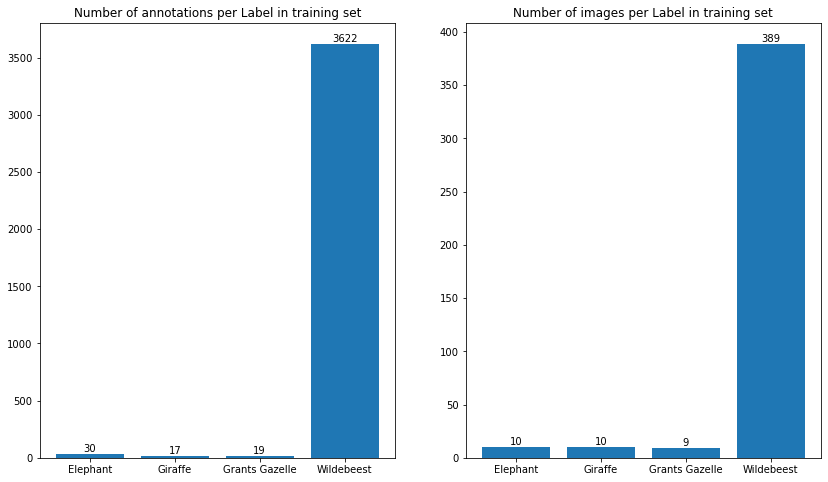

In [65]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,8))
ax[0].bar(train_label_count['Label'],train_label_count['No of annotations'])
ax[0].set_title("Number of annotations per Label in training set")
for i in range(4):
    ax[0].text(i,train_label_count['No of annotations'][i]+20,train_label_count['No of annotations'][i],ha='center')

ax[1].bar(train_im_count['Label'],train_im_count['No of Images'])
ax[1].set_title("Number of images per Label in training set")

for i in range(4):
    ax[1].text(i,train_im_count['No of Images'][i]+2,train_im_count['No of Images'][i],ha='center')

In [110]:
imbalance_train.to_csv("imbalance_train.csv",index=False)
imbalance_valid.to_csv("imbalance_valid.csv",index=False)

In [111]:
!cp '/home/jovyan/lost+found/annotations/imbalance_train.csv' '/home/jovyan/lost+found/yolo3/train/imbalance_train.csv'
!cp '/home/jovyan/lost+found/annotations/imbalance_valid.csv' '/home/jovyan/lost+found/yolo3/valid/imbalance_valid.csv'